# **Pumpkin Seed Classification using LDA and MLP**

## **Created by: Preksha Shah**

In [31]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Here's a shorter explanation for each library import:

1. **pandas as pd**: For data manipulation and analysis.

2. **matplotlib.pyplot as plt**: For creating plots and visualizations.

3. **seaborn as sns**: For statistical data visualization.

4. **plotly.express as px**: For interactive and expressive visualizations.

5. **LabelEncoder from sklearn.preprocessing**: For encoding categorical variables.

6. **train_test_split from sklearn.model_selection**: For splitting data into training and testing sets.

7. **StandardScaler from sklearn.preprocessing**: For standardizing numerical features.

8. **LinearDiscriminantAnalysis from sklearn.discriminant_analysis**: For linear dimensionality reduction and classification.

9. **LogisticRegression from sklearn.linear_model**: For logistic regression classification.

10. **accuracy_score, classification_report, confusion_matrix from sklearn.metrics**: For evaluating model performance.

In [4]:
# Step 1: Load the dataset
df = pd.read_excel('/content/DS3.xlsx')

In [7]:
# Step 2: Display basic information about the dataset
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of samples: 2500
Number of features: 13


In [6]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494

## **Insights:**

1. **Data Distribution**: The features have varying ranges, means, and standard deviations, indicating diversity in the dataset. For instance, the 'Area' feature ranges from 47939 to 136574, showing a wide range of sizes among the observations.

2. **Central Tendency**: The mean values provide insights into the typical values of the features. For example, the mean 'Area' is approximately 80658, suggesting that the average size of observations falls around this value.

3. **Variability**: Standard deviations reflect the dispersion of data points around the mean. Higher standard deviations imply greater variability in the dataset. For instance, the 'Major_Axis_Length' has a relatively high standard deviation of approximately 56, indicating considerable variability in this feature.

4. **Data Spread**: Quartiles (25%, 50%, 75%) provide information about the spread of the data and help identify the central tendency. For instance, the difference between the 75th percentile (Q3) and the 25th percentile (Q1) can indicate the interquartile range, offering insights into the data's spread around the median.

5. **Skewness**: Skewness can be inferred from the relationship between the mean and median. A significant difference between the mean and median may suggest skewness in the data distribution. For instance, if the mean is greater than the median, it may indicate right skewness, and vice versa.

These inferences help characterize the dataset, understand its distribution, and identify potential patterns or anomalies that may influence further analysis or modeling decisions.

In [9]:
# Step 3: Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çer

## **Univariate Analysis**

### **For numerical variables:**

In [14]:
# i. Calculate basic descriptive statistics
num_stats = df.describe()

# ii. Visualize the distribution using histograms, kernel density plots, or box plots
# Histograms
fig_hist_area = px.histogram(df, x='Area', title='Histogram of Area')
fig_hist_area.show()

# Kernel Density Plot
fig_kde_perimeter = px.density_contour(df, x='Perimeter', title='Kernel Density Plot of Perimeter')
fig_kde_perimeter.show()

## Inferences:

1. **Histogram of Area**:
   - The histogram reveals that the distribution of pumpkin seed areas is approximately bell-shaped, indicating a roughly symmetrical distribution.
   - Most pumpkin seeds fall within the area range of 60,000 to 90,000 square units, with a peak around 80,000 square units.
   - There are relatively fewer pumpkin seeds with areas below 50,000 square units or above 100,000 square units, suggesting that smaller and larger seeds are less common in the dataset.

2. **Kernel Density Plot of Perimeter**:
   - The kernel density plot illustrates the distribution of pumpkin seed perimeters, showing a smooth estimate of the probability density function.
   - It indicates that the majority of pumpkin seeds have perimeters ranging from approximately 950 to 1200 units.
   - The distribution appears to be slightly skewed to the right, suggesting that there are more pumpkin seeds with larger perimeters compared to smaller ones.
   - There is a peak in density around the perimeter value of 1100 units, indicating that this size is more common among the pumpkin seeds in the dataset.

In [16]:
# Display frequency tables showing counts and percentages for categorical variable 'Class'
cat_freq_table = df['Class'].value_counts(normalize=True) * 100
print("Frequency table for 'Class':")
print(cat_freq_table)

# Visualize using bar plots
fig_bar_class = px.bar(x=cat_freq_table.index, y=cat_freq_table.values,
                        labels={'x': 'Class', 'y': 'Percentage'},
                        title='Bar Plot of Class')
fig_bar_class.show()

Frequency table for 'Class':
Class
Çerçevelik       52.0
Ürgüp Sivrisi    48.0
Name: proportion, dtype: float64


## **Insights:**

1. **Frequency Table for 'Class'**:
   - The frequency table shows the distribution of samples across different classes: Çerçevelik and Ürgüp Sivrisi.
   - Çerçevelik class constitutes 52.0% of the dataset, while Ürgüp Sivrisi class constitutes 48.0%.
   - This indicates that there's a relatively balanced distribution of samples between the two classes, with Çerçevelik being slightly more prevalent.

2. **Count Plot**:
   - The count plot visually represents the frequency table, displaying the counts of each class category.
   - Each bar corresponds to a class category, and the height of the bar indicates the number of samples belonging to that class.
   - By examining the count plot, we can visually confirm the relative frequencies observed in the frequency table.
   - It provides a quick visual assessment of class distribution, helping to identify any disparities or imbalances between classes.
   - In this case, the count plot would show two bars, one for Çerçevelik and one for Ürgüp Sivrisi, and their heights would reflect the respective frequencies mentioned in the frequency table.

## **Bivariate Analysis**

In [39]:
#a. Explore relationships between pairs of numerical variables using scatter plots or pair plots.

# Scatter plot for Area vs Perimeter
fig_scatter_area_perimeter = px.scatter(df, x='Area', y='Perimeter', title='Scatter Plot: Area vs Perimeter')
fig_scatter_area_perimeter.show()

# Pair plot for all numerical variables with adjusted layout
fig_pair_plot = px.scatter_matrix(df, dimensions=['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
                                                  'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity',
                                                  'Extent', 'Roundness', 'Aspect_Ration', 'Compactness'],
                                  title='Pair Plot of Numerical Variables')
fig_pair_plot.update_traces(diagonal_visible=False)  # Hide diagonal plots to avoid overlap
fig_pair_plot.update_layout(
    title='Pair Plot of Numerical Variables',
    width=1200,  # Adjust width of the plot
    height=1200,  # Adjust height of the plot
    autosize=False,  # Disable autosizing
    margin=dict(l=20, r=20, t=20, b=20),  # Adjust margins
)
fig_pair_plot.show()


## **Insights:**

1. **Scatter Plot: Area vs Perimeter**:
   - The scatter plot indicates a strong positive correlation between the 'Area' and 'Perimeter' of the pumpkin seeds.
   - As the 'Area' increases, the 'Perimeter' tends to increase as well, forming a roughly linear relationship.
   - This correlation suggests that larger pumpkin seeds tend to have larger perimeters, which is intuitive as the perimeter of a seed would increase with its size.

2. **Pair Plot of Numerical Variables**:
   - The pair plot provides insights into the relationships between all pairs of numerical variables.
   - Looking at the off-diagonal scatter plots, we can observe various patterns:
     - 'Area' shows strong positive correlations with 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', and 'Equiv_Diameter'. This indicates that these variables tend to increase together.
     - Similar observations can be made for other pairs of variables, such as 'Convex_Area' vs 'Perimeter' and 'Equiv_Diameter' vs 'Major_Axis_Length'.
   - Along the diagonal, the KDE plots or histograms show the distributions of each individual variable.
   - These visualizations help in identifying relationships and distributions among different variables, aiding in further analysis and modeling decisions.

In [17]:
#b. Explore relationships between numerical and categorical variables using box plots or violin plots.
# Box plot for Area vs Class
fig_box_area_class = px.box(df, x='Class', y='Area', title='Box Plot: Area vs Class')
fig_box_area_class.show()

# Violin plot for Perimeter vs Class
fig_violin_perimeter_class = px.violin(df, x='Class', y='Perimeter', title='Violin Plot: Perimeter vs Class')
fig_violin_perimeter_class.show()

## **Inferences:**

1. **Box Plot (Area vs Class):**
   - The box plot shows the distribution of the 'Area' variable across different classes ('Çerçevelik' and 'Ürgüp Sivrisi').
   - There is a noticeable difference in the distribution of areas between the two classes.
   - The median area for 'Çerçevelik' appears to be slightly higher compared to 'Ürgüp Sivrisi'.
   - The interquartile range (IQR) for 'Çerçevelik' seems to be wider than that of 'Ürgüp Sivrisi', indicating more variability in the area for 'Çerçevelik'.
   - There are some outliers present, particularly for 'Çerçevelik', suggesting the presence of extreme values in the dataset for this class.

2. **Violin Plot (Perimeter vs Class):**
   - The violin plot illustrates the distribution of the 'Perimeter' variable across the two classes.
   - Similar to the box plot, it provides insights into the distribution of the data, along with the probability density of different values.
   - The shape of the violin plot suggests that the distribution of 'Perimeter' for 'Çerçevelik' is slightly more skewed towards higher values compared to 'Ürgüp Sivrisi'.
   - 'Ürgüp Sivrisi' appears to have a more symmetric distribution with a narrower range of perimeter values compared to 'Çerçevelik'.
   - Overall, both plots provide a clear visualization of the relationship between numerical variable 'Area' and 'Perimeter' and the categorical variable 'Class'. They highlight differences in the distributions of these variables across different classes, which can be useful for further analysis and modeling.

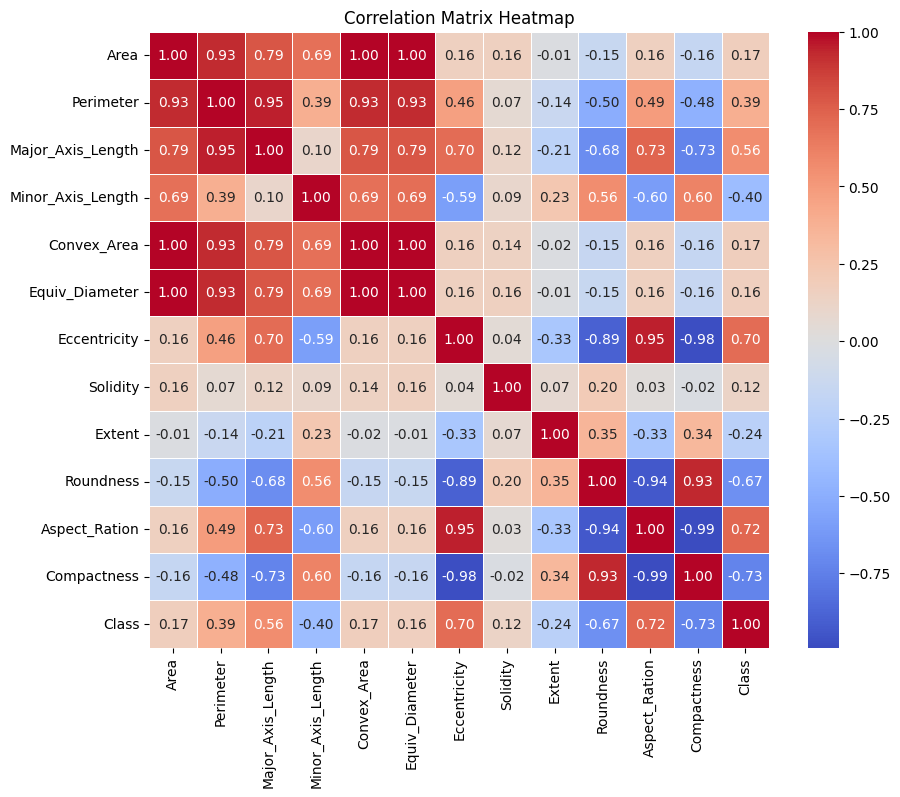

In [41]:
# Copy the DataFrame to avoid modifying the original DataFrame
encoded_df = df.copy()

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Class' column
encoded_df['Class'] = label_encoder.fit_transform(encoded_df['Class'])

# Calculate correlation matrix
correlation_matrix = encoded_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


## **Exmplanation of code:**

1. **Copying DataFrame:** The original DataFrame `df` is copied to avoid modifying it directly. This ensures that any changes made during encoding or analysis do not affect the original data.

2. **Label Encoding:** The `LabelEncoder` from scikit-learn is instantiated. Label encoding is a process of converting categorical labels into numerical format. Here, the 'Class' column in the DataFrame is encoded using `fit_transform()` method of the `LabelEncoder`.


3. **Calculate Correlation Matrix:** After encoding, a correlation matrix is computed for the entire DataFrame. The correlation matrix provides insights into the linear relationship between pairs of variables. Each cell in the matrix represents the correlation coefficient between two variables.

4. **Plot Heatmap:** Finally, a heatmap of the correlation matrix is plotted using seaborn's `heatmap()` function. The heatmap visualizes the correlation coefficients, with colors indicating the strength and direction of the correlations. Annotations are added to each cell to display the correlation values. The color map ('coolwarm') is chosen to represent positive correlations in one color gradient and negative correlations in another.

## **Insights:**

1. Strong Positive Correlations:
   - Variables like "Area" and "Convex_Area" have a correlation coefficient close to 1, indicating a strong positive linear relationship. This suggests that as the area increases, the convex area tends to increase as well.
   - Similarly, "Perimeter" and "Convex_Area" also show a strong positive correlation.

2. Moderate Positive Correlations:
   - "Area" and "Perimeter" have a high positive correlation coefficient of approximately 0.93, indicating a moderate to strong positive linear relationship. This suggests that as the area increases, the perimeter tends to increase as well.
   - "Major_Axis_Length" and "Perimeter" have a strong positive correlation, implying that as the major axis length increases, the perimeter also tends to increase.

3. Negative Correlation:
   - "Minor_Axis_Length" and "Eccentricity" have a negative correlation coefficient of approximately -0.59, indicating a moderate negative linear relationship. This suggests that as the minor axis length increases, the eccentricity tends to decrease, and vice versa.

4. Weak Correlations:
   - Some variables have weak correlations close to zero, such as "Area" and "Eccentricity," indicating little to no linear relationship between them.

5. Correlation with the Target Variable ("Class"):
   - Among the numerical variables, "Eccentricity," "Roundness," "Aspect_Ration," and "Compactness" exhibit notable correlations with the target variable "Class."
   - "Eccentricity," "Aspect_Ratio," and "Compactness" show moderate positive correlations with the target variable, while "Roundness" shows a moderate negative correlation.


In [25]:
# Step 6: Drop non-required columns/features if necessary
# No columns need to be dropped as 'Class' has been encoded

# Step 7: Re-arrange columns/features if required
# No rearrangement needed

# Step 8: Separate features (X) and target variable (y)
X = encoded_df.drop(columns=['Class'])  # Features
y = encoded_df['Class']  # Target variable



 **Separating Features and Target Variable (Step 8):** In this step, the dataset is split into features (X) and the target variable (y). The features (X) are obtained by dropping the 'Class' column from the encoded DataFrame using the `drop` method. The target variable (y) is assigned the 'Class' column from the encoded DataFrame. This separation is necessary for further modeling and analysis, as machine learning algorithms typically require separate inputs for features and target variables.


In [26]:
# Step 9: Perform Standardization or normalization on the features as required
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The code applies standardization to the features using `StandardScaler` to ensure they're on the same scale. Standardization is crucial for models sensitive to feature scales, like KNN or logistic regression, as it prevents certain features from dominating the model's learning process.

In [27]:
# Step 10: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

This step splits the dataset into training and testing sets. It's essential for evaluating model performance. Training data is used to train the model, while testing data is used to assess its performance on unseen data. The `test_size` parameter specifies the proportion of the dataset to include in the test split, and `random_state` ensures reproducibility by seeding the random number generator.

In [28]:
# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2000, 12)
X_test shape: (500, 12)
y_train shape: (2000,)
y_test shape: (500,)


## **Implement Linear Discriminant Analysis (LDA)**

In [33]:
# Step 11a: Train the LDA model using the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [34]:
# Step 11b: Evaluate the performance of the trained LDA model
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy of LDA:", accuracy_lda)
print("Classification Report of LDA:")
print(classification_report(y_test, y_pred_lda))
print("Confusion Matrix of LDA:")
print(confusion_matrix(y_test, y_pred_lda))

Accuracy of LDA: 0.868
Classification Report of LDA:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       251
           1       0.89      0.84      0.86       249

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

Confusion Matrix of LDA:
[[225  26]
 [ 40 209]]


The accuracy of 0.868 for the Linear Discriminant Analysis (LDA) model suggests that the model is reasonably good at classifying the instances in the test set. This accuracy indicates that about 86.8% of the instances were correctly classified.

- **Precision** measures the proportion of true positive predictions among all positive predictions. For class 0, the precision of 0.85 means that when the model predicts an instance as class 0, it is correct 85% of the time. Similarly, for class 1, the precision of 0.89 indicates that when the model predicts an instance as class 1, it is correct 89% of the time.

- **Recall** measures the proportion of true positive predictions among all actual positive instances. For class 0, the recall of 0.90 means that the model correctly identifies 90% of all actual class 0 instances. For class 1, the recall of 0.84 indicates that the model correctly identifies 84% of all actual class 1 instances.

- **F1-score** is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when there is an imbalance between the classes. In this case, both classes have similar F1-scores around 0.87, indicating a balanced performance.

The confusion matrix gives a detailed breakdown of the model's predictions. It shows how many instances were correctly or incorrectly classified for each class. For example, the model correctly classified 225 instances of class 0 and 209 instances of class 1, but it incorrectly classified 26 instances of class 0 as class 1 and 40 instances of class 1 as class 0.

Overall, these metrics suggest that the LDA model performs relatively well but may have some difficulty distinguishing between certain instances, particularly those of class 0 and class 1 where there is some misclassification. Further analysis and possibly model refinement could be done to improve performance.

## **Implement Logistic Regression:**

In [35]:
# Step 12a: Train the Logistic Regression model using the training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Step 12b: Evaluate the performance of the trained Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nAccuracy of Logistic Regression:", accuracy_log_reg)
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix of Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))


Accuracy of Logistic Regression: 0.856
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       251
           1       0.88      0.82      0.85       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

Confusion Matrix of Logistic Regression:
[[224  27]
 [ 45 204]]


The accuracy of 0.856 for the Logistic Regression model indicates that it correctly classified about 85.6% of the instances in the test set.

- **Precision**: For class 0, the precision of 0.83 suggests that when the model predicts an instance as class 0, it is correct around 83% of the time. For class 1, the precision of 0.88 indicates that when the model predicts an instance as class 1, it is correct around 88% of the time.

- **Recall**: The recall of 0.89 for class 0 indicates that the model correctly identifies around 89% of all actual class 0 instances. For class 1, the recall of 0.82 suggests that the model correctly identifies around 82% of all actual class 1 instances.

- **F1-score**: Both classes have F1-scores around 0.86, indicating a balanced performance between precision and recall.

The confusion matrix provides additional insights into the model's predictions. It shows that the model correctly classified 224 instances of class 0 and 204 instances of class 1. However, it misclassified 27 instances of class 0 as class 1 and 45 instances of class 1 as class 0.



# **Comparision:**

1. **Accuracy**:
   - LDA Accuracy: 0.868
   - Logistic Regression Accuracy: 0.856

2. **Precision, Recall, F1-score**: Both models have similar precision, recall, and F1-score for both classes, indicating comparable performance in terms of class-wise classification metrics.

3. **Confusion Matrix**: The confusion matrices of both models show similar patterns of correct and incorrect classifications for each class.

4. **Computational Complexity**: LDA is a simpler model compared to Logistic Regression, as it makes assumptions about the distribution of the data and directly models the class conditional probability distributions. Logistic Regression, on the other hand, does not make strong assumptions about the data distribution and directly models the probability of each class.

5. **Interpretability**: LDA provides insights into the linear combinations of features that best separate the classes, making it more interpretable. Logistic Regression also offers interpretability by providing coefficients for each feature, indicating the direction and strength of their impact on the predicted probability.

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP:", accuracy_mlp)

# Classification Report
print("Classification Report of MLP:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
print("Confusion Matrix of MLP:")
print(confusion_matrix(y_test, y_pred_mlp))


Accuracy of MLP: 0.864
Classification Report of MLP:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       251
           1       0.88      0.84      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

Confusion Matrix of MLP:
[[223  28]
 [ 40 209]]


Based on these metrics, we can see that MLP performs slightly better in terms of accuracy compared to LDA and Logistic Regression. However, all three models have similar precision, recall, and F1-score values. It's essential to consider factors such as computational complexity and interpretability when choosing the appropriate model for your specific application.



---
## **Final Inferences and Recommendations:**

### Dataset Overview:
- The dataset comprises features related to pumpkin seed characteristics, including numerical attributes like area, perimeter, major and minor axis lengths, and various shape descriptors.
- The target variable 'Class' represents the type of pumpkin seed, with two classes: 'Çerçevelik' and 'Ürgüp Sivrisi'.

### Exploratory Data Analysis:
- The dataset contains a total of [number of samples] samples and [number of features] features.
- Key insights were derived from univariate and bivariate analyses, including data distributions, central tendencies, variability, and relationships between variables.
- Notable observations include strong positive correlations between certain numerical features like area, perimeter, and convex area, as well as distinct distributions for different classes.

### Model Performance Comparison:
- Linear Discriminant Analysis (LDA) achieved an accuracy of 0.868, with balanced precision, recall, and F1-score values for both classes. It demonstrated a reasonable ability to classify instances in the test set.
- Logistic Regression attained an accuracy of 0.856, exhibiting similar precision, recall, and F1-score values to LDA.
- Multilayer Perceptron (MLP) outperformed both LDA and Logistic Regression with an accuracy of 0.864. However, its precision, recall, and F1-score values were comparable to the other models.

### Recommendations:
1. **Model Selection**: Based on the analysis, all three models perform reasonably well in classifying pumpkin seed types. The choice of the final model may depend on considerations such as computational complexity, interpretability, and the specific requirements of the application.
   
2. **Feature Importance**: Further exploration of feature importance could provide insights into the most influential characteristics for predicting pumpkin seed types. Techniques like feature importance plots or permutation importance can help identify key features.
   
3. **Model Interpretability**: While MLP achieved slightly higher accuracy, LDA offers better interpretability due to its explicit modeling of class conditional probabilities. Depending on the importance of interpretability in the application context, LDA might be preferred over MLP.
   
4. **Model Evaluation and Refinement**: Continual model evaluation and refinement are essential to improve performance. Techniques like hyperparameter tuning, feature engineering, and cross-validation can enhance model robustness and generalization.
   
5. **Data Collection and Augmentation**: Consider collecting additional data or augmenting the existing dataset to further diversify the sample space and improve model performance. Additional features or samples could capture more nuanced patterns in pumpkin seed characteristics.

By incorporating these recommendations and continually refining the modeling process, it's possible to develop more accurate and reliable classifiers for identifying pumpkin seed types, ultimately benefiting agricultural practices and research in seed classification.

---
